**Name**: Brandon Loptman

**Total Score**: 20/20

Code Tests:

Completed Tests: 3/3 

Tests Explained: 2/2 

Application to Physical Systems Modeling:
8/8 

General:

Run without problems: 1/1

Correct structure: 1/1

Logical flow: 1/1

Good graphical representaions: 3/3 

Graphs have axes, labels, ticks, titles, etc.: 1/1 

**Comments**:

Well done!

**Description**:

Code Tests

(3 pts) If code tests are suggested, all such tests are completed.  If code tests aren’t suggested, student has articulated their own code tests and executed those tests to show that code is working properly in at least some small number of obvious cases.  The more robust the code tests are, the better.

(2 pts) All code tests are explained in complete sentences in text cells (along with any relevant mathematics).  There is a reasonable amount of explanation of how one knows that the code tests have been passed.

Application of Code to Physical Systems Modeling

(8 pts) Notebook contains a mixture of explanation text in complete sentences (with math where appropriate) and graphs/other visual representations illustrating how the computer model exhibits the relevant phenomena predicted by the mathematical model of the system.  All prompts have been answered.

General

(1 pts) The whole notebook can be re-started and re-run without halting due to any coding errors.

(1 pts) The notebook has the correct general structure (code tests placed in the beginning and application of code to analysis of relevant physical systems after).

(1 pts) Flow of notebook is logical, clear, and concise.

(3 pts) Graphical/visual representations are used to concisely illustrate results of code tests and simulations.

(1 pts) All graphs with axes have labels on axes with units and tick marks where appropriate.


In [ ]:
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt
import timeit
plt.style.use("ggplot")

# Project 3: Markov Chain Monte Carlo (MCMC) and Statistical Mechanics

This project is broken down into three parts. Since the functions for each simulation are rather long and self contained to a specific simulation, each part will have a code cell at the start with all the necessary functions to complete that part of the assignment.

##Simulate Biased Coin

To begin, we want to show that the identity 

$$
  \langle O \rangle _{k+1} = \langle O \rangle _{k} + \frac{1}{k+1}(o_{k+1} - \langle O \rangle _{k})
$$

is true. We can do this by showing both sides of the above equation are equal. The left hand side is simply the average of all $k+1$ values. That is:

$$
  \langle O \rangle_{k+1} = \frac{o_{1}+o_{2}+\cdots+o_{k+1}}{k+1}.
$$

The right hand side is

$$
  \langle O \rangle _{k} + \frac{1}{k+1}(o_{k+1} - \langle O \rangle _{k}) = \frac{o_{1}+o_{2}+\cdots+o_{k}}{k} + \frac{1}{k+1}(o_{k+1} - \frac{o_{1}+o_{2}+\cdots+o_{k}}{k}) 
$$

The second term can be simplified to

$$
  \frac{o_{k+1}k - (o_{1}+o_{2}+\cdots+o_{k})}{k(k+1)}
$$

which when added to the first term yields

$$
   \langle O \rangle _{k} + \frac{1}{k+1}(o_{k+1} - \langle O \rangle _{k})=
   \frac{(k+1)(o_{1}+o_{2}+\cdots+o_{k})}{k(k+1)} + \frac{o_{k+1}k - (o_{1}+o_{2}+\cdots+o_{k})}{k(k+1)} \\
  = \frac{(k+1-1)(o_{1}+o_{2}+\cdots+o_{k}) + o_{k+1}k}{k(k+1)} \\
  = \frac{k(o_{1}+o_{2}+\cdots+o_{k}) + o_{k+1}k}{k(k+1)} \\
  = \frac{o_{1}+o_{2}+\cdots+o_{k} + o_{k+1}}{k+1} \\
  = \langle O \rangle _{k+1}
$$

Since the left hand and right hand sides of the equation are the same we have shown that the identity is satisfied.


In [ ]:
def next_avg(val,avg,k):
  """
  """
  next_avg = avg + (val-avg)/(k+1)
  return next_avg

def weighted_coin(beta,n,wait_time=1,show_plots = True):
  """
  """
  averages = np.zeros(n)

  earnings = 0
  average = 0
  
  p_current = beta
  p_proposal = .5
  p_proposed = 0

  p_state = "H"
  state = "H"

  for i in range(n):
    p = rand()

    if p <= p_proposal:
      p_state = "H"
      p_proposed = beta

    else:
      p_state = "T"
      p_proposed = 1 - beta
      
    if state == "H":
      p_current = beta

    else:
      p_current = 1 - beta

    p_accept = np.amin(np.array([1,p_proposed/p_current]))
    p = rand()

    if p <= p_accept:
      state = p_state
      
    if state == "H":
      earnings = 1

    else:
      earnings = -1
      
    average = next_avg(earnings,average,i)
    #average = average + (earnings - average)/(i+1)
    averages[i] = average

  n_vals = np.arange(1,n+1,wait_time)

  if show_plots:
    plt.plot(n_vals,averages[0:n:wait_time])
    plt.title(r'Average Earnings ($\beta$ = ' + str(beta) + ', n = ' + str(n) + ')')
    plt.xlabel("Number of Flips (#)")
    plt.ylabel("Average Earnings ($)")
    plt.show()

  return average

def average_earnings_per_flip(beta):
  """
  """
  p_heads = beta
  p_tails = 1-beta

  earnings_heads = 1
  earnings_tails = -1

  return (p_heads*earnings_heads) + (p_tails*earnings_tails)

###Code Tests

For some simple code tests we can test that the `weighted_coin` function returns what we would intuitively expect for some simple cases.  

Consider flipping a fair coin. In this case the coin will land on heads just as often as it lands on tails. That is, $P_{heads} = P_{tails} = \frac{1}{2}$. In this case we would expect our average earnings to be zero in the long run as the coin will land on heads just as often as it lands on tails.  

The following code cell performed $100,000$ flips of the coin with $\beta = .5$ (so the coin is fair). If the code is accurately simulating a fair coin we would expect `avg` to be very close to zero.

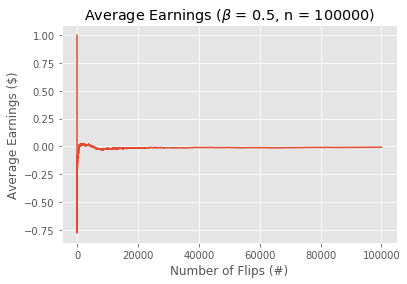

The average earnings per flip is:  -0.006599999999999975


In [ ]:
beta = .5
n = 100000
avg = weighted_coin(beta,n)
print("The average earnings per flip is: ", avg)

The value of `avg` is indeed very close to zero, so the code test is passed.  

Two more simple code tests we can consider is the cases when $\beta = 0$ and $\beta = 1$. In the first case, the probability of getting heads is zero so the game is impossible to win so the average earnings should be $-\$1$. In other case the probability of getting heads is one so, the game is impossible to lose so the average earnings should be $\$1$.  

The below code cells again simulate $100,000$ coin flips with $\beta = .000001$ ($\beta$ cannot be zero as we would encounter a divison by zero error in the way the code is currently implemented, but so long as $\beta$ is small we should still get an average earnings close to what we would expect) and $\beta = 1$, respectively.

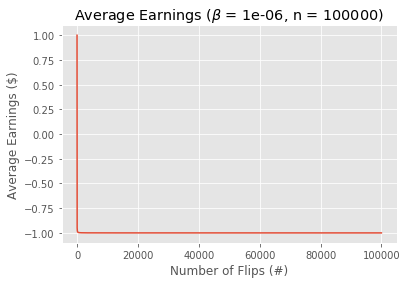

The average earnings per flip is:  -0.9999799999999878


In [ ]:
beta = .000001
n = 100000
avg = weighted_coin(beta,n)
print("The average earnings per flip is: ", avg)

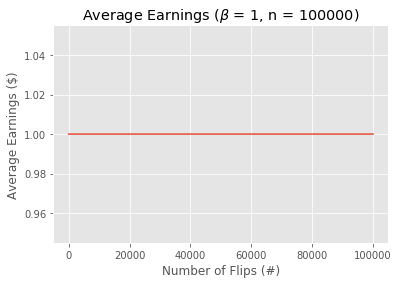

The average earnings per flip is:  1.0


In [ ]:
beta = 1
n = 100000
avg = weighted_coin(beta,n)
print("The average earnings per flip is: ", avg)

Again, we get the values we would intuitively expect, so the code test are passed.

Next, we shall compare the theoretical average earnings to those simulated by our `weighted_coin` function for many $\beta \in [0,1]$. The theoretical average earnings are represented using the red dashed line while the simulated average earnings are represented by the blue solid line in the plots below.

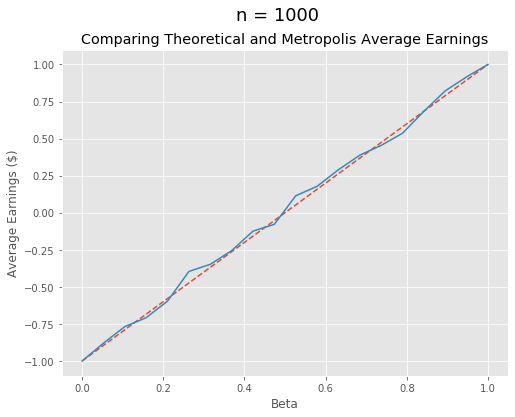

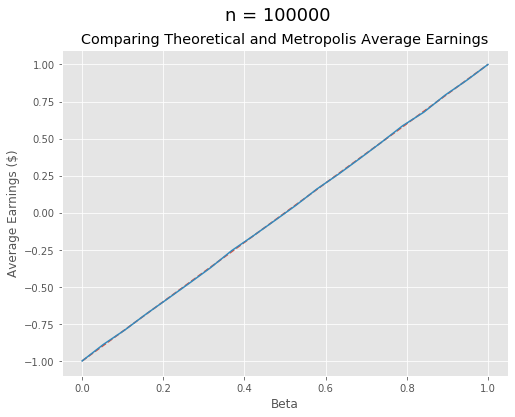

In [ ]:
n_beta = 20
betas = np.linspace(0.0001,1,n_beta)
n_flips = np.array([1000,100000])

average_vals = np.zeros(n_beta)

for i in range(np.size(n_flips)):
  fig,axs = plt.subplots(1,1,figsize=(8,6))
  fig.suptitle("n = " + str(n_flips[i]),fontsize = 18)

  for j in range(n_beta):
    average_vals[j] = weighted_coin(betas[j],n_flips[i],show_plots=False)

  axs.plot(betas,average_earnings_per_flip(betas),linestyle="--")
  axs.plot(betas,average_vals) 
  axs.set_title("Comparing Theoretical and Metropolis Average Earnings")
  axs.set_xlabel("Beta")
  axs.set_ylabel("Average Earnings ($)")

#print(average_vals)

#fig,axs = plt.subplots(1,2,figsize=(12,6))
#axs[0].plot(betas,average_earnings_per_flip(betas))
#axs[1].plot(betas,average_vals)

plt.show()

## Simulate a Weighted Die

In [ ]:
def weighted_die(n):
  average = 0

  p_proposal = 1/6
  p_die = .10

  state = 1
  p_state = 1

  p_current = 3*p_die
  p_proposed = 3*p_die

  for i in range(0,n):
    
    #print("current state = ", state)

    p = rand()
    #print("p1 = ", p)

    if p <= 1*p_proposal:
      p_state = 1
    elif p > 1*p_proposal and p <= 2*p_proposal:
      p_state = 2
    elif p > 2*p_proposal and p <= 3*p_proposal:
      p_state = 3
    elif p >3*p_proposal and p <= 4*p_proposal:
      p_state = 4
    elif p > 4*p_proposal and p <= 5*p_proposal:
      p_state = 5
    else:
      p_state = 6

    if p_state <= 2:
      p_proposed = 3*p_die
    else:
      p_proposed = p_die

    #print("p_state = ", p_state)

    #print("matrix element = ", p_ratios[p_state,state])

    p_accept = np.amin(np.array([1,p_proposed/p_current]))
    #print("p_accept = ", p_accept)

    p = rand()
    #print("p2 = ", p)

    if p <= p_accept:
      state = p_state

    if state <= 2:
      earnings = 1
      p_current = 3*p_die
    else:
      earnings = -1
      p_current = p_die
    
    #print("current state = ", state)
    #print("earnings = ", earnings)
    #print("---------")


    #average = next_average(earnings,average,i)
    average  = average + (earnings-average)/(i+1)

  return average

###Code Tests

For this simulation there isn't anything that can be varied (the die always have six faces and the die is always biased towards 1 and 2) there isn't very much we can do in the way of code tests for this simulation. The only thing we really can do is see what the average earnings the `weighted_die` outputs for large number of die rolls.  

In the following code cell we simulate rolling the biased die $100,000$ times.

In [ ]:
n = 100000
avg = weighted_die(n)
print("The average earnings per die roll is ", avg)

The average earnings per die roll is  0.19675999999999963


We see that the the average earnings from our biased die simulation is $\$.1968$. This is very close to the expectation value of our earnings (which we will compute later). Thus, the code test is passed.

Next, we want to roughly estimate how many steps we need to run the Metropolis algorithm for before the average earnings per roll converge to within $\$.01$ of each other. A method for determining this in the following code cell.

In [ ]:
epsilon = .01
#n = 10

tests = 100

n_list = np.zeros(tests)
averages = np.zeros(2)
avg_list = np.zeros(tests)

#averages[0] = weighted_die(n)
#averages[1] = weighted_die(2*n)

for i in range(tests):
  n = 1000
  averages[0] = weighted_die(n)
  averages[1] = weighted_die(2*n)
  while np.abs(averages[1]-averages[0]) > epsilon:
    n = 2*n
    #print("n = ", n)
    averages[0] = averages[1]
    averages[1] = weighted_die(n)
    #print(averages)
  n_list[i] = n
  avg_list[i] = averages[1]

#print(n_list)

average_n = np.sum(n_list)/tests
average_avg = np.sum(avg_list)/tests
print("Average number of steps for convergence: ", average_n)
print("Average earnings per die roll: ", average_avg)

Average number of steps for convergence:  19970.0
Average earnings per die roll:  0.20005046875000002


From the above code cell we can see that it take roughly around $20,000$ steps for the value of the average earnings to converge to within one cent of each other. After running this code many times I would say a more accurate estimate is somewhere in the neighborhood between $20,000 - 30,000$ steps.  

In the following code cell we test to see how accurate our estimated number of steps for convergence is. We do so by running the `weighted_die` function ten times for $20,000$ die rolls.

In [ ]:
n = 20000
for i in range(10):
  avg = weighted_die(n)
  print("The average earnings per die roll is ", avg)

The average earnings per die roll is  0.2047999999999982
The average earnings per die roll is  0.1874999999999994
The average earnings per die roll is  0.19869999999999913
The average earnings per die roll is  0.1983999999999993
The average earnings per die roll is  0.20270000000000013
The average earnings per die roll is  0.1881999999999997
The average earnings per die roll is  0.2168000000000003
The average earnings per die roll is  0.20399999999999965
The average earnings per die roll is  0.20820000000000008
The average earnings per die roll is  0.1901000000000004


We can see that after $20,000$ steps most of the values for the average earnings per die roll are within a cent of each other. Thus, I would say our estimate is reasonable.

Next, we shall formally compute the average earnings per die roll.  

Let's denote the set of all possible outcomes for the die roll by $X$. Since the die can land on any integer between 1 and 6 $X = \{1,2,3,4,5,6\}$. We shall denote a particular outcome by $x \in X$ and the probability of such an outcome as $P(x)$.  

We are told the probability of the die landing on 1 or 2 is three times more likely than the die landing on 3, 4, 5, or 6. Suppose the probability of the die landing on 3, 4, 5, or 6 is $p$. Then we have:

$$
  P(1) = 3p \\
  P(2) = 3p \\
  P(3) = p \\
  P(4) = p \\
  P(5) = p \\
  P(6) = p
$$

Since probabilities must sum to one we have:

$$
  P(1)+P(2)+P(3)+P(4)+P(5)+P(6)= 1 \\
$$

Substituting in the values of $P(x)$ from the above we then have:

$$
  3p + 3p + p + p + p + p = 1 \\
  10p = 1 \\
  \implies p = .10 
$$

Now, let us define our earnings function $h(x)$ as follows:

$$
  h(x) = 
  \begin{cases}
    $1  &\ x \leq 2 \\
    -$1 &\text{otherwise}
  \end{cases}
$$

Using this information we can calculate the expectation value of our earnings
by the usual formula from statistics:

$$
  E(h(x)) = .30($1) + .30($1) + .10(-$1) + .10(-$1) + .10(-$1) + .10(-$1) \\
   = .60($1) - .40($1) \\
   = $.20
$$

So the average earnings for our weighted die should be 20 cents. This is very close to what we find with our simulation using the Metropolis Algorithm.

## Physical System: 2D Ising Model

In [ ]:
def inital_state(L):
  """
  """
  state = 2*np.random.randint(2,size=(L,L))-1
  return state

def calc_energy(state,H=0):
  """
  """
  energy = 0
  L = len(state)

  for i in range(L):
    for j in range(L):
      S = state[i,j]
      nb = state[(i+1)%L, j] + state[i,(j+1)%L] + state[(i-1)%L, j] + state[i,(j-1)%L]
      energy = energy + -1*(nb*S + H*S)
      #print("S = ", S, "| nb = ", nb,"| energy = ", energy)
  return energy
  
def calc_mag(state):
  """
  """
  mag = np.sum(state)
  #print("mag = ", mag)
  return mag

def mc_move(state,T):
  """
  """
  L = len(state)

  a = np.random.randint(0,L)
  b = np.random.randint(0,L)

  #print(state)
  #print("a = ", a, "| b = ", b)

  s = state[a,b]
  nb = state[(a+1)%L, b] + state[a,(b+1)%L] + state[(a-1)%L, b] + state[a,(b-1)%L]
  dE = 2*s*nb
  dS = 0
  #print("s = ", s, "| nb = ", nb, "| dE = ", dE)

  if dE <= 0:
    s = s*-1
    dS = 2*s

  elif rand() < np.exp(-dE/T):
    s = s*-1
    dS = 2*s
  
  else:
    dE = 0

  state[a,b] = s

  return state,dE,dS

def two_dim_ising(L,temp,num_steps):
  """
  """
  N = L**2
  state = inital_state(L)

  #plt.matshow(state,cmap="Greys")
  #plt.show()

  E = calc_energy(state)
  S = calc_mag(state)

  dE = 0
  dS = 0

  E_avg = np.zeros(num_steps)
  S_avg = np.zeros(num_steps)

  E_avg[0] = E
  S_avg[0] = S

  #print("E0 = ", E, "S0 = ", S)

  for i in range(1,num_steps):
    state, dE, dS = mc_move(state,temp)

    #print("dE = ", dE, "dS = ", dS)

    E = E + dE
    S = S + dS

    #print("E = ", E, "S = ", S)

    E_avg[i] = E_avg[i-1] + (E-E_avg[i-1])/(i+1)
    S_avg[i] = S_avg[i-1] + (S-S_avg[i-1])/(i+1)

  S_avg = np.abs(S_avg)/N
  #S_avg = S_avg/N
  E_avg = E_avg/N

  return state,E_avg,S_avg

def two_dim_ising_move(L,temp,num_steps):
  """
  """
  state = inital_state(L)
  for i in range(num_steps):
    state, dE, dS = mc_move(state,T)
  return state

def two_dim_ising_state(state,temp,num_steps):
  """
  """
  N = np.size(state)

  #plt.matshow(state,cmap="Greys")
  #plt.show()

  E = calc_energy(state)
  S = calc_mag(state)

  dE = 0
  dS = 0

  E_avg = np.zeros(num_steps)
  S_avg = np.zeros(num_steps)

  E_avg[0] = E
  S_avg[0] = S

  #print("E0 = ", E, "S0 = ", S)

  for i in range(1,num_steps):
    state, dE, dS = mc_move(state,temp)

    #print("dE = ", dE, "dS = ", dS)

    E = E + dE
    S = S + dS

    #print("E = ", E, "S = ", S)

    E_avg[i] = E_avg[i-1] + (E-E_avg[i-1])/(i+1)
    S_avg[i] = S_avg[i-1] + (S-S_avg[i-1])/(i+1)

  S_avg = np.abs(S_avg)/N
  #S_avg = S_avg/N
  E_avg = E_avg/N

  return state,E_avg,S_avg

(a) Plotting $U$ and $M$ for $L = 16,32$ 

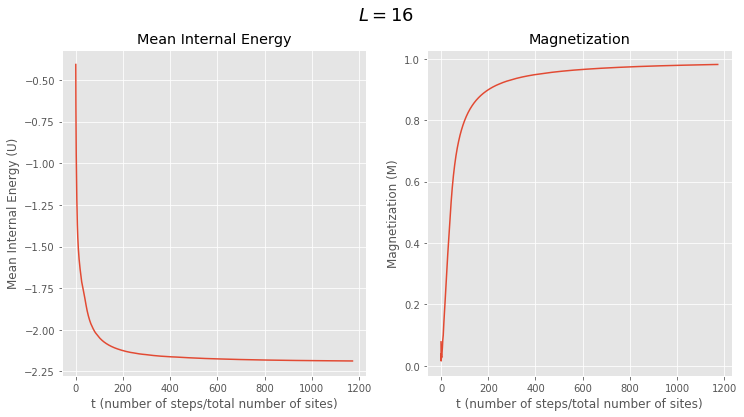

In [ ]:
L = 16
T = 1
N = L**2
num_steps_1 = 300000

tests = 10
mag_list = np.zeros(tests)

state1, U1, M1 = two_dim_ising(L,T,num_steps_1)

n_list = np.arange(0,num_steps_1)
t_list_1 = n_list/N

fig, axs = plt.subplots(1,2,figsize=(12,6))
fig.suptitle("$L = $" + str(L), fontsize = 18)

axs[0].plot(t_list_1,U1)
axs[0].set(title = "Mean Internal Energy",xlabel="t (number of steps/total number of sites)",ylabel= "Mean Internal Energy (U)")
axs[1].plot(t_list_1,M1)
axs[1].set(title = "Magnetization",xlabel="t (number of steps/total number of sites)",ylabel= "Magnetization (M)")
plt.show()

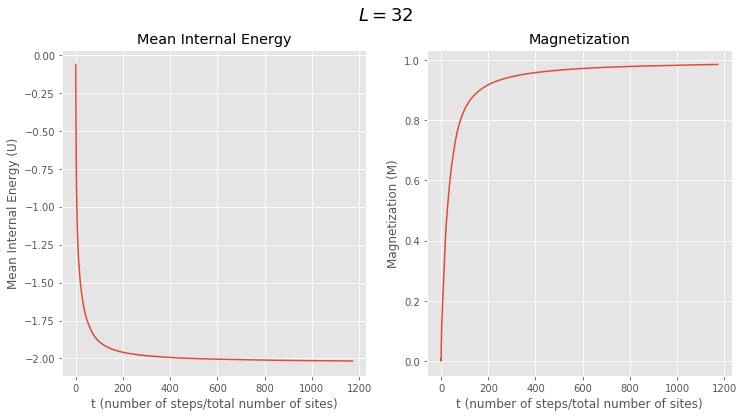

In [ ]:
L = 32
T = 1.0
N = L**2
num_steps_2 = 4*num_steps_1

state2, U2, M2 = two_dim_ising(L,T,num_steps_2)

n_list = np.arange(0,num_steps_2)
t_list_2 = n_list/N

fig, axs = plt.subplots(1,2,figsize=(12,6))
fig.suptitle("$L = $" + str(L), fontsize = 18)

axs[0].plot(t_list_2,U2)
axs[0].set(title = "Mean Internal Energy",xlabel="t (number of steps/total number of sites)",ylabel= "Mean Internal Energy (U)")
axs[1].plot(t_list_2,M2)
axs[1].set(title = "Magnetization",xlabel="t (number of steps/total number of sites)",ylabel= "Magnetization (M)")
plt.show()

By visual inspection of the above plots, we can deduce the time in which it takes each simulation to converge. This is done simply by looking at the graphs and looking to see when the values of $U$ and $M$ begin to stabalize (e.g. not change very much).   

Roughly, both plots appear to converge at around $t = 800$.  

Based on the above plots, the time $t$ it takes the simulation to converge does not appear to depend the size of the system.

The below code cell better shows the similar convergence time for the $L=16$ (red line) and $L=32$ (blue line) size systems. In the plots we can see that the two lines nearly overlap, demonstrating that the two simulations converge in very similar times.

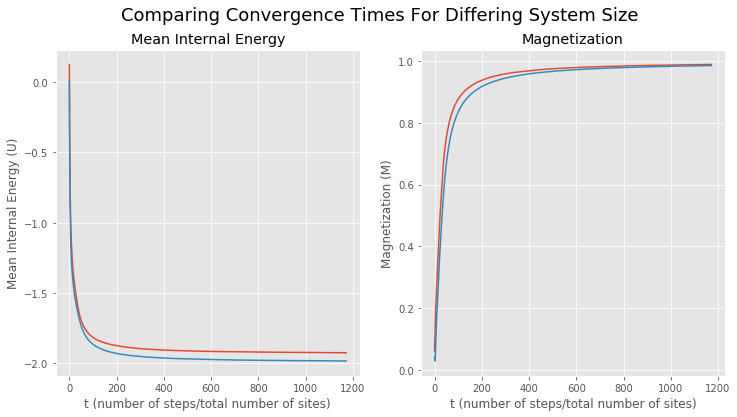

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(12,6))
fig.suptitle("Comparing Convergence Times For Differing System Size",fontsize=18)

axs[0].plot(t_list_1,U1)
axs[0].plot(t_list_2,U2)
axs[0].set(title = "Mean Internal Energy",xlabel="t (number of steps/total number of sites)",ylabel= "Mean Internal Energy (U)")
axs[1].plot(t_list_1,M1)
axs[1].plot(t_list_2,M2)
axs[1].set(title = "Magnetization",xlabel="t (number of steps/total number of sites)",ylabel= "Magnetization (M)")
plt.show()

(b) Plotting $M(T)$ for Various System Sizes

In the following section we will plot the magnetization $M$ as a function of temperature $T$ for various system sizes ranging from $L = 8$ to $L = 64$. Since these are rather time consuming computations we will only be considering ten temperature values for each value of $L$.

In [ ]:
T_crit = 2/np.log(1+np.sqrt(2))

def exact_M(T):
  M = np.zeros(np.size(T))
  for i in range(np.size(T)):
    if T[i] < T_crit:
      M[i] = (1-np.sinh(2/T[i])**(-4))**(1/8)
  return M

#takes around the same time to use the vectorized version
def M(T):
  if T < T_crit:
    return (1-np.sinh(2/T)**(-4))**(1/8)
  else:
    return 0

vec_m = np.vectorize(M)

For our own reference, here is the exact magnetization curve we get using the equation found in the project instructions.

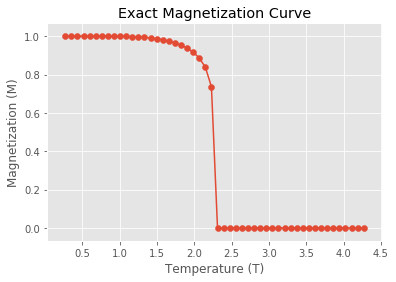

In [ ]:
n_temp = 50
temps_exact = np.linspace(T_crit+2,T_crit-2,n_temp)
mag = exact_M(temps_exact)

plt.title("Exact Magnetization Curve")
plt.xlabel("Temperature (T)")
plt.ylabel("Magnetization (M)")

plt.plot(temps_exact,mag)
plt.scatter(temps_exact,mag)
plt.show()

In [ ]:
n_temp = 10
temps = np.linspace(T_crit+2,T_crit-2,n_temp)

L = 8
eq_steps = 800*(L**2)
num_steps = 1000

state = inital_state(L)

mag_list_8 = np.zeros(n_temp)

for i in range(n_temp):
  for j in range(eq_steps):
    state, dE, dS = mc_move(state,temps[i])
  state, E_avg, S_avg = two_dim_ising_state(state,temps[i],num_steps)
  mag_list_8[i] = S_avg[-1]

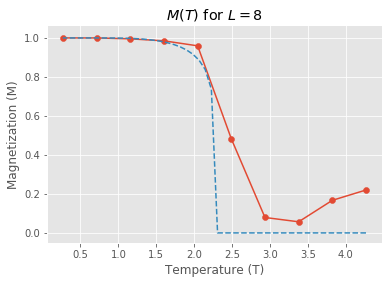

In [ ]:
plt.scatter(temps,mag_list_8)
plt.plot(temps,mag_list_8)

plt.plot(temps_exact,mag,linestyle="--")

plt.title("$M(T)$ for $L = 8$")
plt.xlabel("Temperature (T)")
plt.ylabel("Magnetization (M)")
plt.show()

In [ ]:
n_temp = 10
temps = np.linspace(T_crit+2,T_crit-2,n_temp)

L = 16
eq_steps = 800*(L**2)
num_steps = 1000

state = inital_state(L)

mag_list_16 = np.zeros(n_temp)

for i in range(n_temp):
  for j in range(eq_steps):
    state, dE, dS = mc_move(state,temps[i])
  state, E_avg, S_avg = two_dim_ising_state(state,temps[i],num_steps)
  mag_list_16[i] = S_avg[-1]

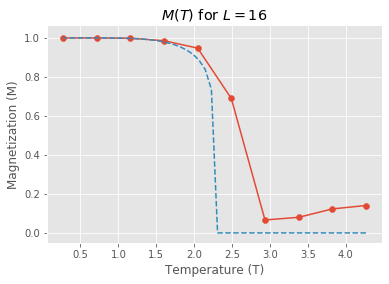

In [ ]:
plt.scatter(temps,mag_list_16)
plt.plot(temps,mag_list_16)
plt.plot(temps_exact,mag,linestyle="--")

plt.title("$M(T)$ for $L = 16$")
plt.xlabel("Temperature (T)")
plt.ylabel("Magnetization (M)")
plt.show()

In [ ]:
n_temp = 10
temps = np.linspace(T_crit+2,T_crit-2,n_temp)

L = 32
eq_steps = 800*(L**2)
num_steps = 1000

state = inital_state(L)

mag_list_32 = np.zeros(n_temp)

for i in range(n_temp):
  for j in range(eq_steps):
    state, dE, dS = mc_move(state,temps[i])
  state, E_avg, S_avg = two_dim_ising_state(state,temps[i],num_steps)
  mag_list_32[i] = S_avg[-1]

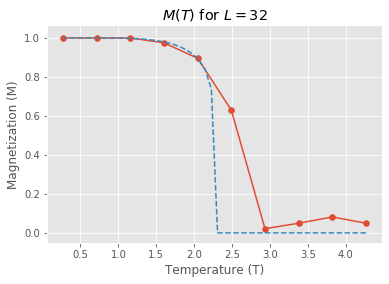

In [ ]:
plt.scatter(temps,mag_list_32)
plt.plot(temps,mag_list_32)
plt.plot(temps_exact,mag,linestyle="--")

plt.title("$M(T)$ for $L = 32$")
plt.xlabel("Temperature (T)")
plt.ylabel("Magnetization (M)")
plt.show()

In [ ]:
n_temp = 10
temps = np.linspace(T_crit+2,T_crit-2,n_temp)

L = 64
eq_steps = 1000*(L**2)
num_steps = 1000

state = inital_state(L)

mag_list_64 = np.zeros(n_temp)

for i in range(n_temp):
  for j in range(eq_steps):
    state, dE, dS = mc_move(state,temps[i])
  state, E_avg, S_avg = two_dim_ising_state(state,temps[i],num_steps)
  mag_list_64[i] = S_avg[-1]

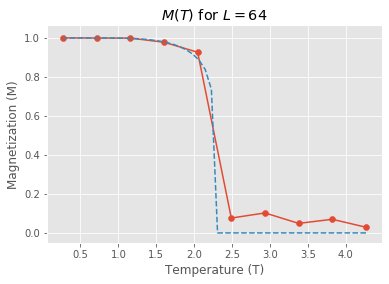

In [ ]:
plt.scatter(temps,mag_list_64)
plt.plot(temps,mag_list_64)
plt.plot(temps_exact,mag,linestyle="--")

plt.title("$M(T)$ for $L = 64$")
plt.xlabel("Temperature (T)")
plt.ylabel("Magnetization (M)")
plt.show()

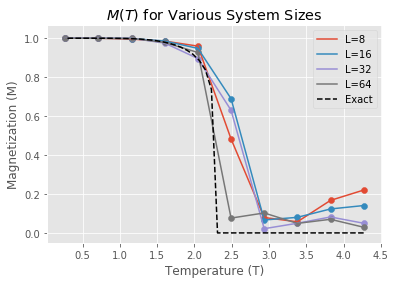

In [ ]:
plt.scatter(temps,mag_list_8)
plt.plot(temps,mag_list_8,label="L=8")

plt.scatter(temps,mag_list_16)
plt.plot(temps,mag_list_16,label="L=16")

plt.scatter(temps,mag_list_32)
plt.plot(temps,mag_list_32,label="L=32")

plt.scatter(temps,mag_list_64)
plt.plot(temps,mag_list_64,label="L=64")

plt.plot(temps_exact,mag,linestyle="--",color="black",label="Exact")

plt.legend()
plt.title("$M(T)$ for Various System Sizes")
plt.xlabel("Temperature (T)")
plt.ylabel("Magnetization (M)")
plt.show()

Even with only a few data points the magnetization curves for each system size generally seem to follow the shape of the exact solution. The simulated curves match up particularly well for temperatures above and below the critical temperature. We can also observe that as the system size increases, the simulated magnetization curves begin to more closely follow the theoretical magnetization curve, which we would expect since the analytic mangetization equation is derivied in the limit $L \to \infty$.

(c) Typical Spin Configurations for Different Temperatures


Below we plot the equalibrium spin configurations for a few temperatures.

mag =  9518


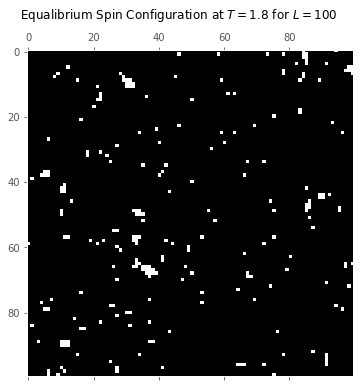

In [ ]:
L = 100
num_steps = 30000000
T = 1.8

state = two_dim_ising_move(L,T,num_steps)
mag = calc_mag(state)
print("mag = ", mag)

fig,axs = plt.subplots(1,1,figsize=(12,6))
fig.suptitle("Equalibrium Spin Configuration at $T = " + str(T) + "$ for $L = 100$")
axs.matshow(state,cmap="Greys")
plt.grid(b=None)
plt.show()

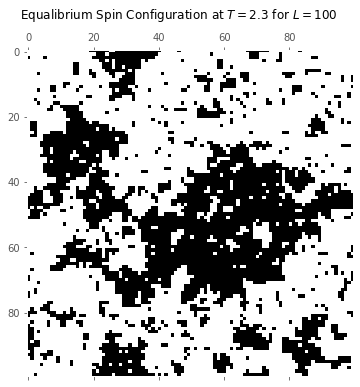

In [ ]:
L = 100
num_steps =  30000000
T = 2.3

state = two_dim_ising_move(L,T,num_steps)

fig,axs = plt.subplots(1,1,figsize=(12,6))
fig.suptitle("Equalibrium Spin Configuration at $T = " + str(T) + "$ for $L = 100$")
axs.matshow(state,cmap="Greys")
plt.grid(b=None)
plt.show()

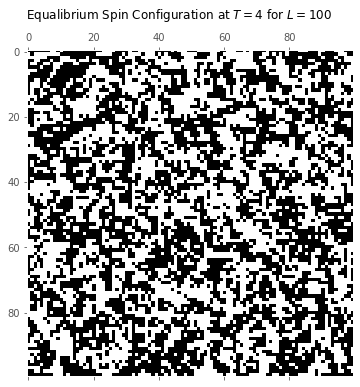

In [ ]:
L = 100
num_steps = 30000000
T = 4

state = two_dim_ising_move(L,T,num_steps)

fig,axs = plt.subplots(1,1,figsize=(12,6))
fig.suptitle("Equalibrium Spin Configuration at $T = " + str(T) + "$ for $L = 100$")
axs.matshow(state,cmap="Greys")
plt.grid(b=None)
plt.show()

* At $T = 1.8$, which is below the the critical temperature nearly all of the spins are aligned. This is what we would expect from the analytic magnetization equation since $M(1.8) \approx .96$, so we would expect most spins in the same direction. This tells us that systems at below the critical temperature are very stable.

* At $T = 4$, which is above the critical temperature the spin configuration appears to be random with no discernible patterns. Again, this is something we would anticipate based on the analytic magnetization equation since $M(4) = 0$, so we would expect an equal amount of up and down spins. This tells us that systems above the critical temperature are very chaotic.

* At $T = 2.3$, which is slightly above the critical temperature we see large groupings or "islands" of similar spins. Based on the analytic magnetization equation we would expect an equal number of up spins and down spins since $M(2.3) = 0$. This tells us that for systems near the critical temperature have properties of both systems above and below the critical temperature.
